### *Data Analysis*
##  Plot Prevalence Score and T-Test on the aggregate
---
*conducted in April 2022*

In [2]:
from nltk.probability import FreqDist
import statistics
from matplotlib import pyplot
import pandas as pd
from scipy.stats import fisher_exact
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
import math
import os
from matplotlib import cm
from colorspacious import cspace_converter
import docx

---
### 1. Investigate prevalence data and prepare two sample test (will be run in SPSS)
---

In [20]:
prev_df = pd.read_excel(r"/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/20_results/10_analysis/LDA_aggregate/prevalence_scores_python.xlsx")

In [21]:
debate = ["EU02_Democratic scrutiny of social media and the protection of fundamental rights.txt", "EU03_European strategy for data - Commission evaluation report on the implementation of the General Data Protection Regulation two years after its application.txt",
"EU11_Digital Europe programme.txt", 
"EU13_Artificial intelligence in education, culture and the audiovisual sector.txt", 
"EU14_Digital future of Europe- digital single market and use of AI for European consumers.txt",
"EU15_ Promoting gender equality in science, technology, engineering and mathematics - STEM - education and careers.txt",
"EU18_Artificial intelligence in criminal law and its use by the police and judicial authorities in criminal matters.txt", 
"EU21_The outcome of the EU-US Trade and Technology Council.txt", 
"US02_CONSUMER SAFETY TECHNOLOGY ACT.txt", 
"US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER SCIENCE WORK ACT.txt", 
"US06_75th ANNIVERSARY OF THE OFFICE OF NAVAL RESEARCH.txt",
"US09_MSI STEM ACHIEVEMENT ACT.txt", 
"US10_National Defense Authorization Act.txt", 
"US15_FUTURE OF RADAR.txt", "US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTURE ACT.txt",
"US18_STATEMENTS ON INTRODUCED BILLS AND JOINT RESOLUTIONS.txt", 
"US20_INTRODUCTION OF THE TRANSATLANTIC TELECOMMUNICATIONS SECURITY ACT.txt",
"US32_NATIONAL PULSE MEMORIAL.txt", 
"US37_ENDLESS FRONTIER ACT.txt"]

In [22]:
prev_df["debate_title"] = debate

---
#### 1.1 Visualise the prevalence scores per topics for the EU and US

In [24]:
# Create column for residual topic contribution to debates
prev_df["sum_topics"] = prev_df["National_security"] + prev_df["Citizen_consumer_protection"] + prev_df["Democracy"] + prev_df["Domestic_us_economy"] + prev_df["AI_education"] + prev_df["Global_market"]
prev_df["residual_topics"] = 1 - prev_df["sum_topics"] 

In [25]:
prev_df

,level,National_security,Citizen_consumer_protection,Democracy,Domestic_us_economy,AI_education,Global_market,debate_title,sum_topics,residual_topics
0,EU,0.005140,0.091896,0.529401,0.002357,0.016734,0.084372,EU02_Democratic scrutiny of social media and t...,0.729900,0.270100
1,EU,0.016366,0.352943,0.046997,0.030060,0.071622,0.218048,EU03_European strategy for data - Commission e...,0.736036,0.263964
2,EU,0.011445,0.154340,0.043443,0.046274,0.272449,0.161979,EU11_Digital Europe programme.txt,0.689931,0.310069
3,EU,0.006723,0.228821,0.109698,0.007158,0.342230,0.071812,"EU13_Artificial intelligence in education, cul...",0.766443,0.233557
4,EU,0.004272,0.365274,0.059089,0.017860,0.118363,0.172087,EU14_Digital future of Europe- digital single ...,0.736945,0.263055
5,EU,0.005651,0.070948,0.022064,0.014008,0.558136,0.089526,"EU15_ Promoting gender equality in science, te...",0.760333,0.239667
6,EU,0.012450,0.487660,0.114973,0.007050,0.019577,0.047598,EU18_Artificial intelligence in criminal law a...,0.689309,0.310691
7,EU,0.006443,0.097553,0.067919,0.021445,0.032365,0.530195,EU21_The outcome of the EU-US Trade and Techno...,0.755920,0.244080
8,US,0.176546,0.406211,0.024135,0.084303,0.020991,0.058726,US02_CONSUMER SAFETY TECHNOLOGY ACT.txt,0.770912,0.229088
9,US,0.221802,0.086453,0.018059,0.118611,0.278438,0.032697,US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER ...,0.756060,0.243940


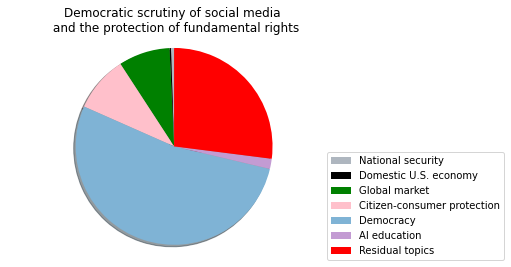

In [9]:
# Pie chart to plot mixture of all 19 debates
# EU02_Democratic scrutiny of social media and the protection of fundamental rights
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.005140, 0.002357, 0.084372, 0.091896, 0.529401, 0.016734, 0.270100 ]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Democratic scrutiny of social media \n and the protection of fundamental rights")
plt.axis('equal')
plt.show()

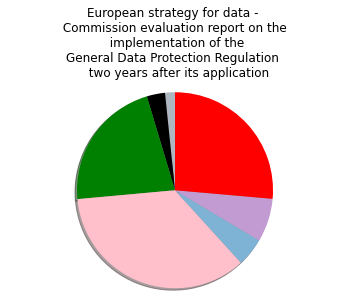

In [12]:
# EU03_European strategy for data - Commission evaluation report on the implementation of the General Data Protection Regulation two years after its application
sizes = [0.016366, 0.030060, 0.218048, 0.352943, 0.046997, 0.071622, 0.263964]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("European strategy for data - \n Commission evaluation report on the \n  implementation of the \nGeneral Data Protection Regulation \n  two years after its application")
plt.axis('equal')
plt.show()

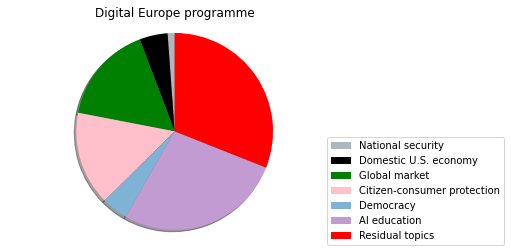

In [13]:
# EU11_Digital Europe programme
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.011445, 0.046274, 0.161979,0.154340, 0.043443, 0.272449, 0.310069]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Digital Europe programme")
plt.axis('equal')
plt.show()

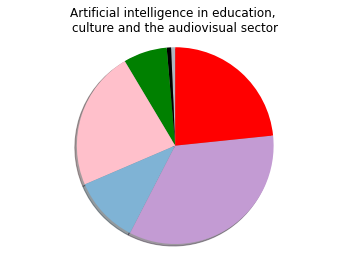

In [14]:
# EU13_Artificial intelligence in education, culture and the audiovisual sector
sizes = [0.006723, 0.007158, 0.071812, 0.228821, 0.109698, 0.342230, 0.233557]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("Artificial intelligence in education, \nculture and the audiovisual sector")
plt.axis('equal')
plt.show()

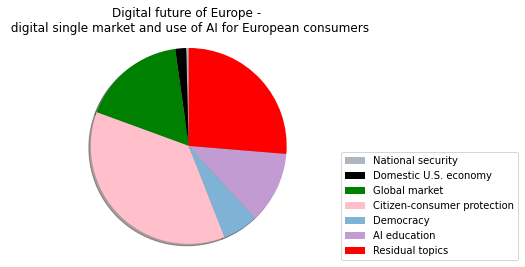

In [15]:
# EU14_Digital future of Europe- digital single market and use of AI for European consumers
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.004272, 0.017860, 0.172087, 0.365274, 0.059089, 0.118363, 0.263055]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Digital future of Europe - \n digital single market and use of AI for European consumers")
plt.axis('equal')
plt.show()

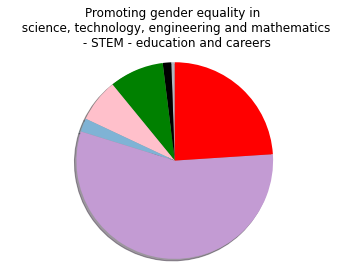

In [16]:
# EU15_ Promoting gender equality in science, technology, engineering and mathematics - STEM - education and careers
sizes = [0.005651, 0.014008, 0.089526, 0.070948, 0.022064, 0.558136, 0.239667]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("Promoting gender equality in \n  science, technology, engineering and mathematics \n - STEM - education and careers")
plt.axis('equal')
plt.show()

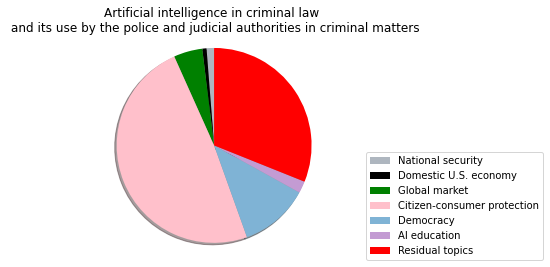

In [17]:
# EU18_Artificial intelligence in criminal law and its use by the police and judicial authorities in criminal matters
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.012450, 0.007050, 0.047598, 0.4876608, 0.114973, 0.019577, 0.310691]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Artificial intelligence in criminal law \n and its use by the police and judicial authorities in criminal matters")
plt.axis('equal')
plt.show()

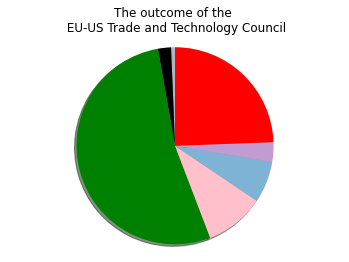

In [18]:
# EU21_The outcome of the EU-US Trade and Technology Council
sizes = [0.006443, 0.021445, 0.530195, 0.097553, 0.067919, 0.032365, 0.244080]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("The outcome of the \n EU-US Trade and Technology Council")
plt.axis('equal')
plt.show()

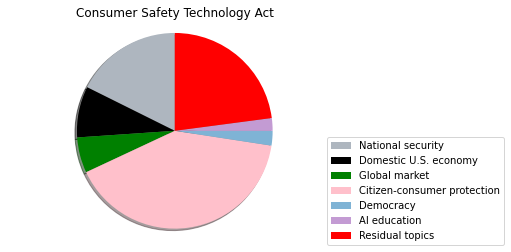

In [19]:
# US02_CONSUMER SAFETY TECHNOLOGY ACT
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.176546, 0.084303, 0.058726, 0.406211, 0.024135, 0.020991, 0.229088]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Consumer Safety Technology Act")
plt.axis('equal')
plt.show()

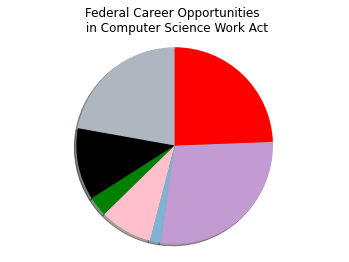

In [20]:
# US04_FEDERAL CAREER OPPORTUNITIES IN COMPUTER SCIENCE WORK ACT
sizes = [0.221802, 0.118611, 0.032697, 0.086453, 0.018059, 0.278438, 0.243940]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("Federal Career Opportunities \n in Computer Science Work Act")
plt.axis('equal')
plt.show()

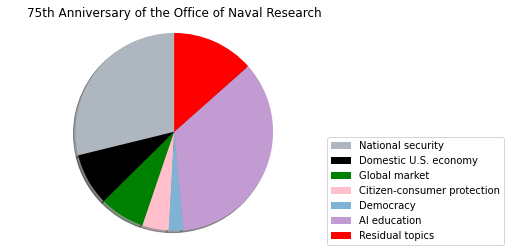

In [21]:
# US06_75th ANNIVERSARY OF THE OFFICE OF NAVAL RESEARCH
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.288307, 0.085556, 0.074127, 0.043228, 0.023545, 0.350741, 0.134497]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("75th Anniversary of the Office of Naval Research")
plt.axis('equal')
plt.show()

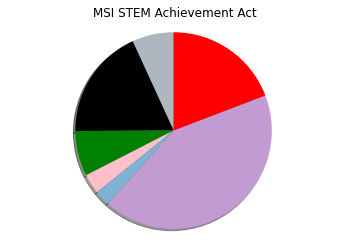

In [22]:
# US09_MSI STEM ACHIEVEMENT ACT
sizes = [0.068381, 0.182510, 0.074417, 0.032716, 0.025583, 0.424486, 0.191907]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("MSI STEM Achievement Act")
plt.axis('equal')
plt.show()

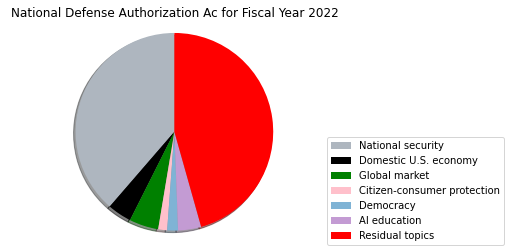

In [32]:
# US10_National Defense Authorization Act
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.386509, 0.039370, 0.047842, 0.014608, 0.017636, 0.037771, 0.456264]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("National Defense Authorization Ac for Fiscal Year 2022")
plt.axis('equal')
plt.show()

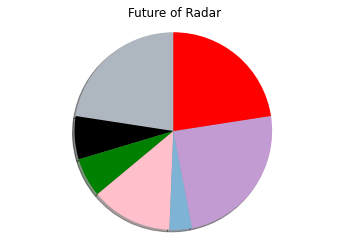

In [24]:
# US15_FUTURE OF RADAR.txt", "US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTURE ACT
sizes = [0.225748, 0.070605, 0.064069, 0.133213, 0.036894, 0.243980, 0.225490]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("Future of Radar")
plt.axis('equal')
plt.show()

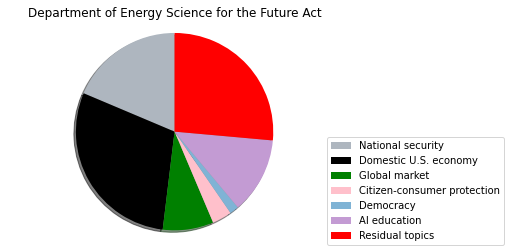

In [25]:
# US16_DEPARTMENT OF ENERGY SCIENCE FOR THE FUTURE ACT
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.186430, 0.294375, 0.083037, 0.032082, 0.014866, 0.124988, 0.264223]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Department of Energy Science for the Future Act")
plt.axis('equal')
plt.show()

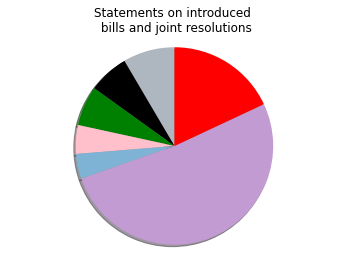

In [26]:
# US18_STATEMENTS ON INTRODUCED BILLS AND JOINT RESOLUTIONS
sizes = [0.084661, 0.066069, 0.065184, 0.047034, 0.040837, 0.515826, 0.180390]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("Statements on introduced \n bills and joint resolutions")
plt.axis('equal')
plt.show()

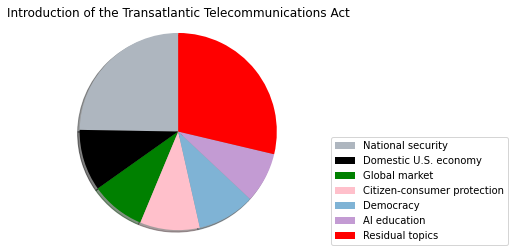

In [27]:
# US20_INTRODUCTION OF THE TRANSATLANTIC TELECOMMUNICATIONS SECURITY ACT
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.247293, 0.100871, 0.089101, 0.098046, 0.094750, 0.082980, 0.286959]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Introduction of the Transatlantic Telecommunications Act")
plt.axis('equal')
plt.show()

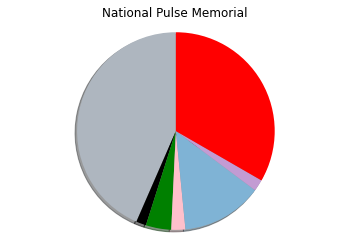

In [28]:
# US32_NATIONAL PULSE MEMORIAL
sizes = [0.434567, 0.016449, 0.041503, 0.023003, 0.132354, 0.018884, 0.333240]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.title("National Pulse Memorial")
plt.axis('equal')
plt.show()

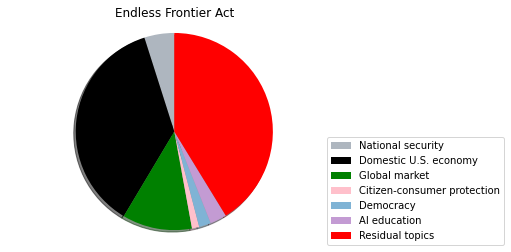

In [31]:
# US37_ENDLESS FRONTIER ACT
labels = 'National security', 'Domestic U.S. economy','Global market', 'Citizen-consumer protection', 'Democracy', 'AI education', 'Residual topics'
sizes = [0.049093, 0.365211, 0.114488, 0.011928, 0.019464, 0.027279, 0.412537]
explode = (0, 0, 0, 0, 0, 0, 0)
colors = ['#AEB6BF', 'black', 'green', 'pink', '#7FB3D5', '#C39BD3', 'red']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, explode=explode)
plt.legend(patches, labels, loc='upper right', bbox_to_anchor=(1.5, 0.5))
plt.title("Endless Frontier Act")
plt.axis('equal')
plt.show()

---
#### 1.2 Calculate the mean prevalence scores and visualise

In [27]:
# Calculating the mean prevalence scores for each topic for the EU
mean_eu_military = prev_df[:-11]["National_security"].mean()
mean_eu_citizen_rights_online = prev_df[:-11]["Citizen_consumer_protection"].mean()
mean_eu_democracy = prev_df[:-11]["Democracy"].mean()
mean_eu_domestic_us_economy = prev_df[:-11]["Domestic_us_economy"].mean()
mean_eu_global_market = prev_df[:-11]["Global_market"].mean()
mean_eu_AI_education = prev_df[:-11]["AI_education"].mean()
mean_eu_residual = prev_df[:-11]["residual_topics"].mean()

In [28]:
# Calculating the mean prevalence scores for each topic for the US
mean_us_military = prev_df[8:]["National_security"].mean()
mean_us_citizen_rights_online = prev_df[8:]["Citizen_consumer_protection"].mean()
mean_us_democracy = prev_df[8:]["Democracy"].mean()
mean_us_domestic_us_economy = prev_df[8:]["Domestic_us_economy"].mean()
mean_us_global_market = prev_df[8:]["Global_market"].mean()
mean_us_AI_education = prev_df[8:]["AI_education"].mean()
mean_us_residual = prev_df[8:]["residual_topics"].mean()

In [29]:
# initialize data of lists.
means = {'eu_us':['EU', 'U.S.'],
        'National_security':[mean_eu_military, mean_us_military],
        'Citizen_consumer_protection':[mean_eu_citizen_rights_online, mean_us_citizen_rights_online] ,
        'Democracy_':[mean_eu_democracy, mean_us_democracy] ,
        'Domestic_us_economy':[mean_eu_domestic_us_economy, mean_us_domestic_us_economy],
        'Global_market':[mean_eu_global_market, mean_us_global_market],
        'AI_education':[mean_eu_AI_education, mean_us_AI_education],
        'Residual_top':[mean_eu_residual, mean_us_residual] }
 
# Create DataFrame
means = pd.DataFrame(means)

In [30]:
means

,eu_us,National_security,Citizen_consumer_protection,Democracy_,Domestic_us_economy,Global_market,AI_education,Residual_top
0,EU,0.008561,0.231179,0.124198,0.018277,0.171952,0.178934,0.266898
1,U.S.,0.215394,0.084411,0.040738,0.129448,0.067745,0.193306,0.268958


In [31]:
means["National security"] = means["National_security"]*100
means["Citizen-consumer protection"] = means["Citizen_consumer_protection"]*100
means["Democracy"] = means["Democracy_"]*100
means["Domestic U.S. economy"] = means["Domestic_us_economy"]*100
means["Global market"] = means["Global_market"]*100
means["AI education"] = means["AI_education"]*100
means["Residual topics"] = means["Residual_top"]*100

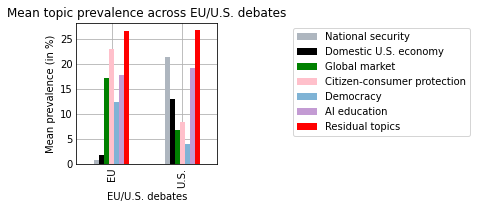

In [32]:
fig = means.plot(x="eu_us", y=["National security",  "Domestic U.S. economy", "Global market", "Citizen-consumer protection", "Democracy", "AI education", "Residual topics"], kind="bar", grid =True, title="Mean topic prevalence across EU/U.S. debates", xlabel="EU/U.S. debates", ylabel="Mean prevalence (in %)", color={"National security": "#AEB6BF", "Citizen-consumer protection":'pink', "Democracy": "#7FB3D5", "Domestic U.S. economy" : "black", "Global market":"green", "AI education":"#C39BD3", "Residual topics":"red"}).legend(bbox_to_anchor=(1.5, 1)).get_figure()

In [33]:
# Save dataframe
means.to_csv('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/00_data/50_analysis/prevalence_means-aggregate.csv')  


# Create dataframe for table output for word
df_word = means.drop(['National_security', 'Citizen_consumer_protection', 'Democracy_', 'Domestic_us_economy','Global_market', 'AI_education'], axis=1)

# Save to table in word
doc = docx.Document('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/20_results/10_analysis/LDA_aggregate/prevalence_means-aggregate.docx')

t = doc.add_table(means.shape[0]+1, df_word.shape[1])

# add the header rows.
for j in range(df_word.shape[-1]):
    t.cell(0,j).text = df_word.columns[j]

# add the rest of the data frame
for i in range(df_word.shape[0]):
    for j in range(df_word.shape[-1]):
        t.cell(i+1,j).text = str(df_word.values[i,j])

# save the doc
doc.save('/Users/charlottekaiser/Documents/uni/Hertie/master_thesis/20_results/10_analysis/LDA_aggregate/LDA-prevalence_means-aggregate.docx')